# k-means法
同じグループに属しているオブジェクトは、他のグループに属しているオブジェクトよりも互いに関連性が高い。<br>
実装が簡単で、計算効率もよい。

クラスタリングの種類<br>
・プロトタイプベース<br>
・階層的<br>
・密度ベース

プロトタイプベースのプロトタイプの種類<br>
・セントロイド…特徴量が連続値の場合に、類似する点の中心を表す<br>
・メドイド…特徴量がカテゴリ値の場合に、最も代表的または頻度の高い点を表す

クラスタリングの品質評価<br>
・エルボー法<br>
・シルエット図

In [3]:
from IPython.display import Image
%matplotlib inline

In [4]:
# データセットを作成
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, # サンプル数
                  n_features=2,  # 説明変数の数
                  centers=3,  # グループ数
                  cluster_std=0.5,  # バラケ具合
                  shuffle=True, 
                  random_state=0)

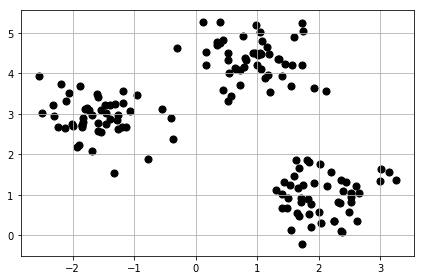

In [8]:
# 描画
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='black', marker='o', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/spheres.png', dpi=300)
plt.show()


kmeans法の手順<br>
1.クラスタの中心の初期値として、サンプルからk個のセントロイドをランダムで選びだす<br>
2.各サンプルを最も近いセントロイドに割り当てる<br>
3.セントロイドに割り当てられたサンプルの中心にセントロイドを移動する<br>
4.サンプルへのクラスタの割当が変化しなくなるか、繰り返しの最大回数に達するまで繰り返す

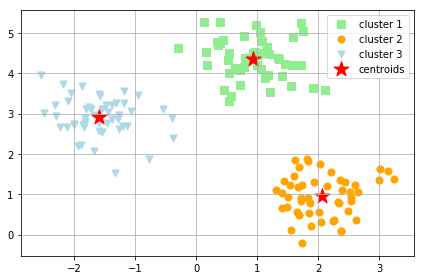

In [9]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,  # クラスタの個数
            init='random',  # 初期値はランダムに選択
            n_init=10,  # kmeans自体の実行回数
            max_iter=300, # 繰り返し回数
            tol=1e-04, # 収束と判定する際の誤差
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)
plt.show()

# エルボー法
kの数を変化させ、どのKが最適化を見る<br>
下の例で言うと、k=3が適している

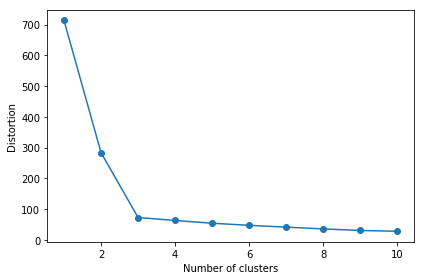

In [10]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()


# シルエット図
クラスタ内のサンプルがどの程度密にグループ化されているかの目安となるグラフをプロットする

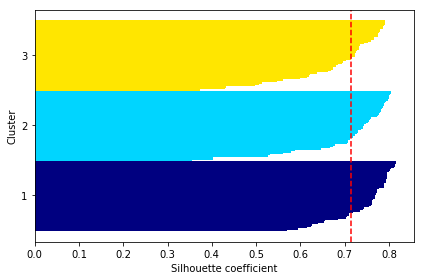

In [11]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

In [12]:
# 以下省略